In [2]:
%load_ext autoreload
%autoreload 2
from read_data import data_files
from xmax_reader import XmaxReader
import numpy as np
import matplotlib.pyplot as plt

In [32]:
xreader = XmaxReader()

In [ ]:
xreader()

In [18]:
from astrotools import mean_xmax
import numpy as np

In [19]:
mean_xmax(np.log10(1e18), 1, model="QGSJetII")

Hello
-0.0


736.0

In [2]:
xmax_reader = XmaxReader()

In [106]:
path_01 = "/ceph/work/SATORI/projects/TA-ASIoP/tasdmc_dstbank/qgsii03proton/080511_230511/noCuts_HiResSpectrum/"

In [107]:
files = data_files(data_dir=path_01, glob_pattern="**/DAT*gz")

In [110]:
xmax_reader(files[5983])

844.6672

In [111]:
import numpy as np

In [114]:
fff = np.zeros(10, dtype=np.float32)
fff.fill(xmax_reader(files[583]))

In [115]:
fff

array([690.07635, 690.07635, 690.07635, 690.07635, 690.07635, 690.07635,
       690.07635, 690.07635, 690.07635, 690.07635], dtype=float32)

In [3]:
dst_directory = (
        "/ceph/work/SATORI/projects/TA-ASIoP/tasdmc_dstbank/"
        "qgsii03proton/080511_230511/noCuts_HiResSpectrum/"
    )

dst_files = data_files(
    data_dir=dst_directory, glob_pattern="**/DAT*_xmax.txt")

In [7]:
import numpy as np

In [36]:
def file_xmax_map():
    dst_directory = (
        "/ceph/work/SATORI/projects/TA-ASIoP/tasdmc_dstbank/"
        "qgsii03proton/080511_230511/noCuts_HiResSpectrum/"
    )

    dst_files = data_files(data_dir=dst_directory, glob_pattern="**/DAT*_xmax.txt")

    file_idx = []
    all_xmax = []
    all_xmax_vert = []
    all_cost = []
    all_zenith = []
    for dst_file in dst_files:
        nfile, nevents, zenith_angle, xmax = np.loadtxt(
            dst_file, dtype=str, unpack=True
        )

        zenith_angle = np.array(zenith_angle, dtype=np.float32)
        cost = np.cos(zenith_angle * (np.pi / 180))
        xmax_vertical = np.array(xmax, dtype=np.float32)
        xmax = xmax_vertical / cost
        file_idx.append(nfile)
        all_xmax.append(xmax)
        all_xmax_vert.append(xmax_vertical)
        all_cost.append(cost)
        all_zenith.append(zenith_angle)
        
    file_idx = np.concatenate(file_idx)
    all_xmax = np.concatenate(all_xmax)
    all_xmax_vert = np.concatenate(all_xmax_vert)
    all_cost = np.concatenate(all_cost)
    all_zenith = np.concatenate(all_zenith)
    return file_idx, all_xmax, all_xmax_vert, all_cost, all_zenith 

In [37]:
file_idx, all_xmax, all_xmax_vert, all_cost, all_zenith  = file_xmax_map()


In [29]:
sorted(all_xmax_vert)[-80:]
None

In [12]:
file_idx[np.argmax(all_xmax_vert)]

'020902'

In [18]:
ss = np.array(sorted(all_xmax_vert))
ss[ss > 0]

array([  336.29,   338.91,   340.09, ...,  1064.5 ,  1145.9 , 10035.  ],
      dtype=float32)

In [15]:
min(all_xmax), max(all_xmax)

(0.0, 10455.112)

In [39]:
870/np.cos(60*np.pi/180)

1739.9999999999995

In [38]:
np.max(all_zenith)

59.9977

In [53]:
def rand_gumbel(lgE, A, size=None, model='EPOS-LHC'):
    """
    Random Xmax values for given energy E [EeV] and mass number A
    See Manlio De Domenico et al., JCAP07(2013)050, doi:10.1088/1475-7516/2013/07/050
    Args:
        lgE (array): energy log10(E/eV)
        A (array): mass number
        model (string): hadronic interaction model
        size (int, optional): number of xmax values to create
    Returns:
        array of random Xmax values in [g/cm^2]
    """
    lE = lgE - 19
    lnA = np.log(A)
    D = np.array([np.ones_like(A), lnA, lnA**2])

    params = {
        'QGSJetII': {
            'mu': ((758.444, -10.692, -1.253), (48.892, 0.02, 0.179), (-2.346, 0.348, -0.086)),
            'sigma': ((39.033, 7.452, -2.176), (4.390, -1.688, 0.170)),
            'lambda': ((0.857, 0.686, -0.040), (0.179, 0.076, -0.0130))},
        'QGSJetII-04': {
            'mu': ((761.383, -11.719, -1.372), (57.344, -1.731, 0.309), (-0.355, 0.273, -0.137)),
            'sigma': ((35.221, 12.335, -2.889), (0.307, -1.147, 0.271)),
            'lambda': ((0.673, 0.694, -0.007), (0.060, -0.019, 0.017))},
        'Sibyll2.1': {
            'mu': ((770.104, -15.873, -0.960), (58.668, -0.124, -0.023), (-1.423, 0.977, -0.191)),
            'sigma': ((31.717, 1.335, -0.601), (-1.912, 0.007, 0.086)),
            'lambda': ((0.683, 0.278, 0.012), (0.008, 0.051, 0.003))},
        'EPOS1.99': {
            'mu': ((780.013, -11.488, -1.906), (61.911, -0.098, 0.038), (-0.405, 0.163, -0.095)),
            'sigma': ((28.853, 8.104, -1.924), (-0.083, -0.961, 0.215)),
            'lambda': ((0.538, 0.524, 0.047), (0.009, 0.023, 0.010))},
        'EPOS-LHC': {
            'mu': ((775.589, -7.047, -2.427), (57.589, -0.743, 0.214), (-0.820, -0.169, -0.027)),
            'sigma': ((29.403, 13.553, -3.154), (0.096, -0.961, 0.150)),
            'lambda': ((0.563, 0.711, 0.058), (0.039, 0.067, -0.004))}}
    param = params[model]

    p0, p1, p2 = np.dot(param['mu'], D)
    mu = p0 + p1 * lE + p2 * lE**2
    p0, p1 = np.dot(param['sigma'], D)
    sigma = p0 + p1 * lE
    p0, p1 = np.dot(param['lambda'], D)
    lambd = p0 + p1 * lE

    return mu - sigma * np.log(np.random.gamma(lambd, 1. / lambd, size=size))

In [73]:
def gen_log10_energies(n, e_min, e_max, sp_idx):
    """
    Generate random logarithmic energy values based on specified parameters.

    Parameters:
    - n (int): Number of energy values to generate.
    - e_min (float): Minimum energy value.
    - e_max (float): Maximum energy value.
    - sp_idx (float): Spectral index for energy distribution.

    Returns:
    - numpy.ndarray: Array containing randomly generated logarithmic energy values.

    Example:
    >>> gen_log_energies(100, 1e16, 1e18, 2.0)
    array([...])  # Array of 100 logarithmic energy values with a spectral index of 2.0
    """
    if sp_idx == 1:
        # Generate logarithmic energy values for a linear spectrum
        log_energies = np.log10(e_min) + np.log10(e_max / e_min) * np.random.rand(n)
        return log_energies
    else:
        # Calculate parameters for a power-law spectrum
        p1 = (e_min / e_max) ** (sp_idx - 1) - 1

        # Generate logarithmic energy values for a power-law spectrum
        log_energies = np.log10(e_min) - np.log1p(p1 * np.random.rand(n)) / (
            (sp_idx - 1) * np.log(10)
        )
        return log_energies

In [68]:
nn = int(1e6)
logE = 18 + 2.5*np.random.rand(nn)
aa = np.ones_like(logE)
xmax_gumb_qgs = rand_gumbel(logE, aa, None, 'QGSJetII')
xmax_gumb_epos = rand_gumbel(logE, aa, None, 'EPOS-LHC')

In [ ]:
rand_gumbel()

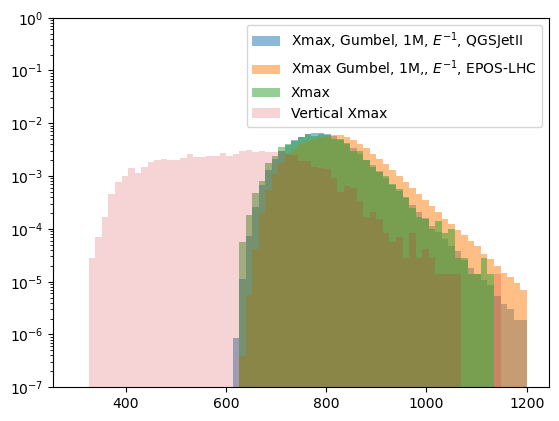

In [71]:
bins = np.linspace(300, 1200, 70)
tt = plt.hist(xmax_gumb_qgs, bins = bins, alpha = 0.5, density=True, label = r"Xmax, Gumbel, 1M, $E^{-1}$, QGSJetII")
tt = plt.hist(xmax_gumb_epos, bins = bins, alpha = 0.5, density=True, label = r"Xmax Gumbel, 1M,, $E^{-1}$, EPOS-LHC")
tt = plt.hist(all_xmax, bins = bins, alpha = 0.5, density=True, label = "Xmax")
tt = plt.hist(all_xmax_vert, bins = bins, alpha = 0.2, density=True, label = "Vertical Xmax")
plt.yscale("log")
plt.ylim(1e-7, 1)
plt.legend()

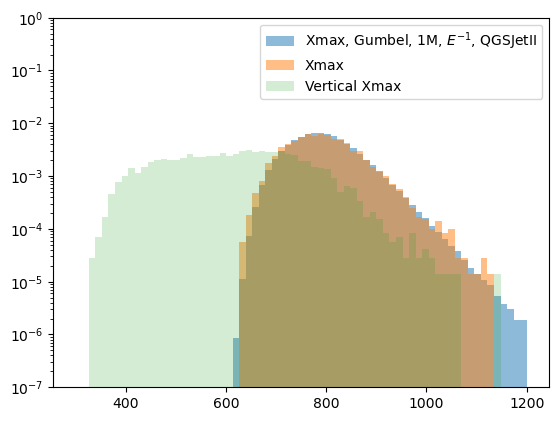

In [72]:
bins = np.linspace(300, 1200, 70)
tt = plt.hist(xmax_gumb_qgs, bins = bins, alpha = 0.5, density=True, label = r"Xmax, Gumbel, 1M, $E^{-1}$, QGSJetII")
# tt = plt.hist(xmax_gumb_epos, bins = bins, alpha = 0.5, density=True, label = r"Xmax Gumbel, 1M,, $E^{-1}$, EPOS-LHC")
tt = plt.hist(all_xmax, bins = bins, alpha = 0.5, density=True, label = "Xmax")
tt = plt.hist(all_xmax_vert, bins = bins, alpha = 0.2, density=True, label = "Vertical Xmax")
plt.yscale("log")
plt.ylim(1e-7, 1)
plt.legend()

In [83]:
nn = int(1e6)
logE_25 = gen_log10_energies(nn, 1e18, 3e20, 2.5)
logE_20 = gen_log10_energies(nn, 1e18, 3e20, 2)
logE_15 = gen_log10_energies(nn, 1e18, 3e20, 1.5)
logE_10 = gen_log10_energies(nn, 1e18, 3e20, 1)
aa = np.ones_like(logE)
xmax_gumb_qgs_25 = rand_gumbel(logE_25, aa, None, 'QGSJetII')
xmax_gumb_qgs_20 = rand_gumbel(logE_20, aa, None, 'QGSJetII')
xmax_gumb_qgs_15 = rand_gumbel(logE_15, aa, None, 'QGSJetII')
xmax_gumb_qgs_10 = rand_gumbel(logE_10, aa, None, 'QGSJetII')

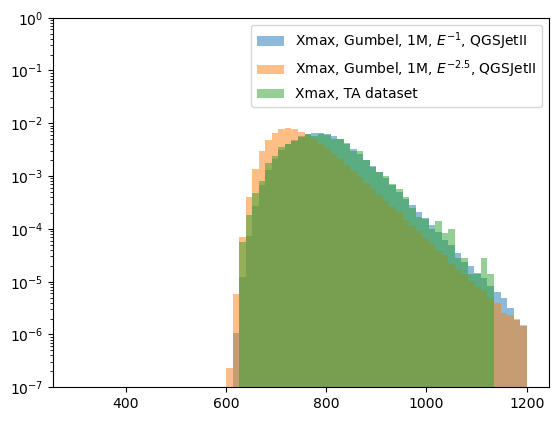

In [90]:
bins = np.linspace(300, 1200, 70)
tt = plt.hist(xmax_gumb_qgs_10, bins = bins, alpha = 0.5, density=True, label = r"Xmax, Gumbel, 1M, $E^{-1}$, QGSJetII")
# tt = plt.hist(xmax_gumb_qgs_15, bins = bins, alpha = 0.5, density=True, label = r"Xmax, Gumbel, 1M, $E^{-1.5}$, QGSJetII")
# tt = plt.hist(xmax_gumb_qgs_20, bins = bins, alpha = 0.5, density=True, label = r"Xmax, Gumbel, 1M, $E^{-2}$, QGSJetII")
tt = plt.hist(xmax_gumb_qgs_25, bins = bins, alpha = 0.5, density=True, label = r"Xmax, Gumbel, 1M, $E^{-2.5}$, QGSJetII")
# tt = plt.hist(xmax_gumb_epos, bins = bins, alpha = 0.5, density=True, label = r"Xmax Gumbel, 1M,, $E^{-1}$, EPOS-LHC")
tt = plt.hist(all_xmax, bins = bins, alpha = 0.5, density=True, label = "Xmax, TA dataset")
# tt = plt.hist(all_xmax_vert, bins = bins, alpha = 0.2, density=True, label = "Vertical Xmax")
plt.yscale("log")
plt.ylim(1e-7, 1)
plt.legend()

In [101]:
def xmax_val(file_idx, all_xmax, idx):
    try:
        return all_xmax[np.where(file_idx == idx)[0]][0]
    except Exception:
        return np.nan

In [25]:
ff = '024725'
int(ff[-2:])

25

In [27]:
aa = np.nan

In [30]:
aa == np.nan

False

In [88]:
file_idx, all_xmax = file_xmax_map()

array(['000000', '000100', '000200', ..., '024725', '024825', '024925'],
      dtype='<U10')

In [102]:
xmax_val(file_idx, all_xmax, "024900")

728.74426

In [89]:
np.where(file_idx == '024900')[0].shape

(1,)

In [91]:
all_xmax[np.where(file_idx == '007700')[0]]

array([908.0149], dtype=float32)

In [60]:
zenith_angle = np.array(zenith_angle, dtype=np.float32)
cost = np.cos(zenith_angle*(np.pi/180))
xmax0 = np.array(xmax, dtype=np.float32)
xmax = xmax0/cost

In [72]:
xmax[np.where(nfile == '00456400')[0]]

array([], dtype=float64)

In [ ]:
def 

    nfile, nevents, zenith_angle, xmax = np.loadtxt(dst_files[0], dtype=str, unpack=True)

In [54]:
# [(c, z, z1)for (c,z, z1)  in zip(xmax0, xmax, 1/cost)]

In [9]:
import matplotlib.pyplot as plt

(array([1.051e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 4.200e+01, 1.710e+02, 3.920e+02, 5.860e+02, 7.890e+02,
        8.370e+02, 8.180e+02, 6.640e+02, 4.470e+02, 2.810e+02, 1.780e+02,
        1.030e+02, 5.600e+01, 3.000e+01, 1.600e+01, 1.400e+01, 7.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
 array([   0.        ,   25.53191489,   51.06382979,   76.59574468,
         102.12765957,  127.65957447,  153.19148936,  178.72340426,
         204.25531915,  229.78723404,  255.31914894,  280.85106383,
         306.38297872,  331.91489362,  357.44680851,  382.9787234 ,
         408.5106383 ,  434.04255319,  459.57446809,  485.10638298,
         510.63829787,  536.17021277,  561.70212766,  587.23404255,
         

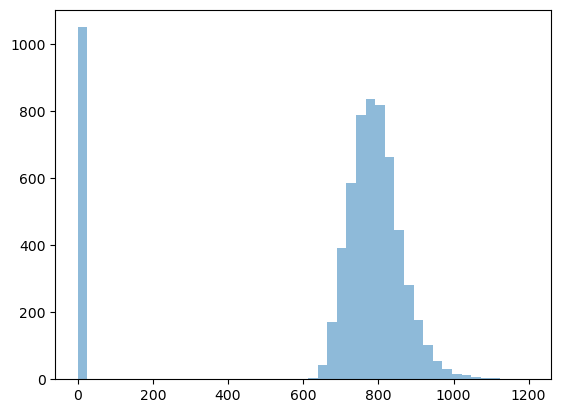

In [10]:
xmax_bins = np.linspace(0,1200,48)
plt.hist(all_xmax, bins = xmax_bins, alpha = 0.5)
# plt.hist(xmax, bins = xmax_bins, alpha = 0.5)
# plt.yscale("log")
# None

In [27]:
zenith_angle = np.array(zenith_angle, dtype=np.float32)
cost = np.cos(zenith_angle*(np.pi/180))
# [(c, z)for (c,z)  in zip(cost, zenith_angle)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


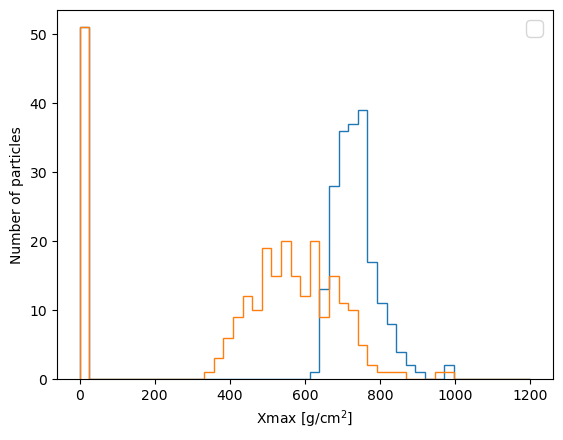

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sys


# DATnnnnxx.long
xx = "00"

nLONG = 0
longitudinal_num_of_particle = []

DIR = "/ceph/work/SATORI/projects/TA-ASIoP/tasdmc_dstbank/qgsii03proton/080511_230511/noCuts_HiResSpectrum/"
input_data = np.loadtxt(DIR + "DATXXXX%s_xmax.txt"%(xx))
xmax = input_data[:,3] / np.cos(input_data[:,2] * np.pi / 180)


xmax_bins = np.linspace(0,1200,48)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(xmax,
        xmax_bins,
        histtype = "step")
ax.hist(input_data[:,3], 
        xmax_bins,
        histtype = "step")
ax.legend(fontsize = 15)
#ax.set_yscale("log")
ax.set_xlabel(r"Xmax [g/cm$^2$]")
ax.set_ylabel(r"Number of particles")
plt.show()

In [3]:
import numpy as np

In [4]:
bin_edges = np.geomspace(1, 1000, 31)

In [20]:
bin_edges[0]

1.0

In [121]:
(bin_edges[1:] + bin_edges[:-1])/2

array([  1.12976135,   1.42296007,   1.7922505 ,   2.2573802 ,
         2.8432216 ,   3.58110215,   4.51047944,   5.68105125,
         7.15541301,   9.01240511,  11.35132882,  14.29725633,
        18.0077189 ,  22.68113073,  28.56739903,  35.98128756,
        45.31924846,  57.0806222 ,  71.8943394 ,  90.55255249,
       114.05299542, 143.65233675, 180.93337908, 227.88969817,
       287.03224799])